In [1]:
import pandas as pd 
import requests 

download_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv'

response = requests.get(download_url)

with open('nba_all_elo.csv', 'wb') as f:
    f.write(response.content)
    
nba = pd.read_csv('nba_all_elo.csv')
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [2]:
knicks_pts_by_year = nba[nba['fran_id'] == 'Knicks'].groupby('year_id')['pts'].sum()

In [3]:
knicks_pts_by_year

year_id
1947    4234
1948    3815
1949    5253
1950    5924
1951    6814
        ... 
2011    9097
2012    6872
2013    9259
2014    8084
2015    7535
Name: pts, Length: 69, dtype: int64

<AxesSubplot:xlabel='year_id'>

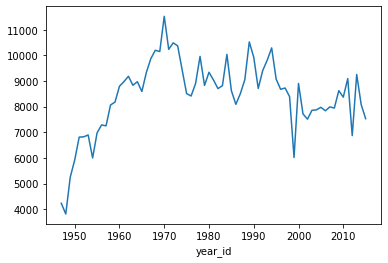

In [4]:
knicks_pts_by_year.plot()

<AxesSubplot:xlabel='year_id'>

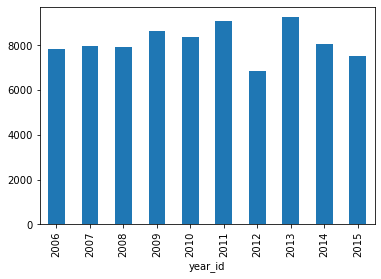

In [6]:
knicks_pts_by_year.tail(10).plot(kind='bar')

<AxesSubplot:xlabel='pts', ylabel='opp_pts'>

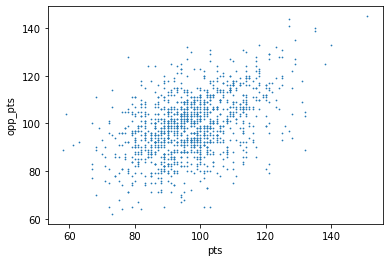

In [8]:
nba[(nba['fran_id'] == 'Knicks') & (nba['year_id'] > 2000)].plot(kind='scatter', x='pts', y='opp_pts', s=0.5)

In [9]:
nba[nba['pts'] == nba['opp_pts']].empty

True

In [10]:
heat_13_wl = nba[
    (nba['fran_id'] == 'Heat') &
    (nba['year_id'] == 2013)
]['game_result'].value_counts()
heat_13_wl

W    82
L    23
Name: game_result, dtype: int64

<AxesSubplot:ylabel='game_result'>

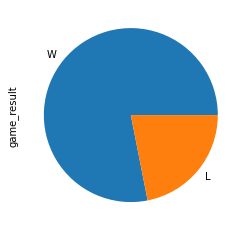

In [11]:
heat_13_wl.plot(kind='pie')